<div style="background-color: orange">
<a id='TableOfContents'></a>
    <b><u><i><h1 style="text-align: center"> Table of Contents:</h1></i></u></b>
<li><a href='#imports'>Imports</a></li>
<li><a href="#acquire">Acquire</a></li>
<li><a href="#prepare">Prepare</a></li>
<li><a href="#explore">Explore</a></li>
<li><a href="#model">Top Model</a></li>
<li><a href="#conclusion">Conclusion</a></li>

##### Orientation:
- Overview
    - Using the 'zillow' dataset from a SQL database acquire properties that have a transaction date of 2017 and are single family/single family inferred homes in order to best predict the home's value.
- Goals
    - Using zillow data from MySQL
    - Clean data for use in jupyter notebook
    - Explore data for any significant features
    - Create model to predict home value

<div style="background-color: orange">
<a id='imports'></a>
    <b><u><i><h1 style="text-align: center"> Imports:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

In [1]:
# Remove unwanted warning banners
import warnings
warnings.filterwarnings('ignore')

# .py files
import wrangle
import final

<div style="background-color: orange">
<a id='acquire'></a>
    <b><u><i><h1 style="text-align: center"> Acquire:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

### Methodology:
1. Using MySQL
    - Check dataframe and tables
    - Combine all tables with a single query
2. Using Python
    - Create SQL connection URL
    - Copy SQL query
3. Acquire zillow data
    - pd.read_sql(query, url)

In [2]:
# Using the 'wrangle.py' import...
# Acquire the 'zillow' dataset via SQL query and read as pandas dataframe
# Get the shape of the vanilla dataset
vanilla = wrangle.acquire()
vanilla.shape

(52441, 69)

##### Justification:
Acquire ONLY data with 'Single Family Residential' or 'Inferred Single Family Residentail' and transaction date in year 2017

THEREFORE:
- JOIN ALL TABLES
- propertylandusetypeid = 261 OR propertylandusetypeid = 279
- transactiondate LIKE '2017%'

<div style="background-color: orange">
<a id='prepare'></a>
    <b><u><i><h1 style="text-align: center"> Prepare:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

In [3]:
# Using the 'wrangle.py' import...
# Take the dataframe and prepare it for exploration and modeling
# Add new/agg/dummy columns
# Fix dtypes of incorrect columns
prepped = wrangle.prepare_mvp()
prepped.shape

(52441, 10)

##### Justification:
Want to prepare data for exploration and modeling purposes

THEREFORE:
- Dropped columns:
    - Too many nulls
    - Useless information (ids)
    - Overlapping information (Location, sqft)
    - Inconsistent information (Location)
- Fix columns:
    - 'bedroomcnt'
        - 'bedroomcnt' ==> 'bedrooms'
    - 'calculatedfinishedsquarefeet'
        - Fill null with mean
        - 'calculatedfinishedsquarefeet' ==> 'home_sqft'
    - 'fips'
        - 'fips' ==> 'county'
        - '6037' ==> 'Los Angeles'
        - '6059' ==> 'Orange'
        - '6111' ==> 'Ventura'
    - 'fullbathcnt'
        - Fill null with mode
        - 'fullbathcnt' ==> 'full_bathrooms'
        - dtype ==> int
    - 'lotsizesquarefeet'
        - Fill nulls with mean
        - 'lotsizesquarefeet' ==> 'lot_sqft'
    - 'yearbuilt'
        - Fill nulls with mode
        - Find diff to 2017
        - Change values to diff
        - 'yearbuilt' ==> 'home_age'
        - dtype ==> int
    - 'taxvaluedollarcnt'
        - Fill nulls with mean
        - 'taxvaluedollarcnt' ==> 'value'
- Create columns:
    - 'home_lot_ratio'
        - 'home_sqft' / 'lot_sqft'
    - Create dummies
        - Easier to explore/model object columns as dummy values

<div style="background-color: orange">
<a id='explore'></a>
    <b><u><i><h1 style="text-align: center"> Explore:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

### Question:
- What appears to have a strong relationship with the home's value?

train.shape:(29366, 10)
validate.shape:(12586, 10)
test.shape:(10489, 10)


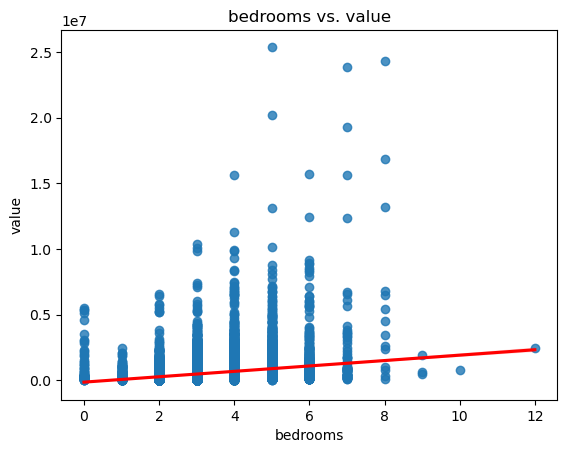

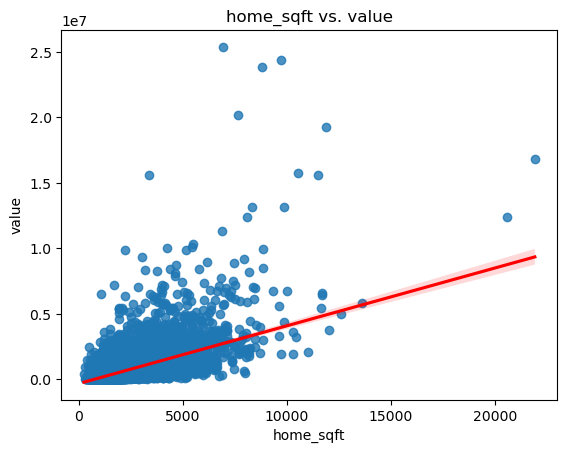

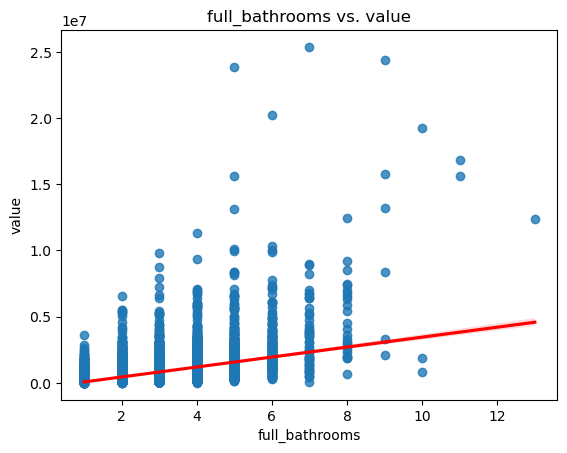

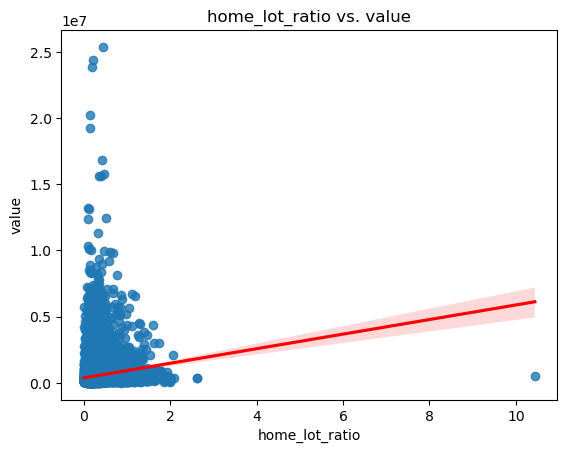

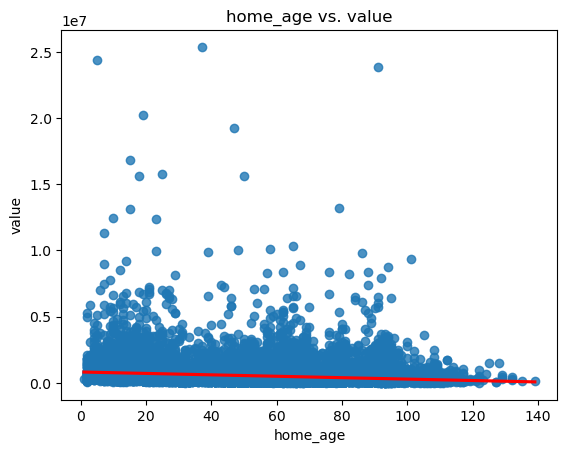

In [4]:
# Using the 'final.py' file...
# Visualize the key features
final.visual()

##### Stats testing

H$_0$: Feature has no significant impact on the home's value.

H$_a$: Feature has significant impact on the home's value.

In [5]:
# Using the 'final.py' file...
# Get the statistical testing for each feature to determine
# Whether or not we can reject the null hypothesis.
final.stat_testing(prepped)

===== REJECT NULL HYPOTHESIS! =====
Feature: bedrooms
Correlation Value: 0.30
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: home_sqft
Correlation Value: 0.53
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: full_bathrooms
Correlation Value: 0.46
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: lotsize_sqft
Correlation Value: 0.16
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: home_age
Correlation Value: -0.28
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: home_lot_ratio
Correlation Value: 0.27
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: county_Los Angeles
Correlation Value: -0.18
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: county_Orange
Correlation Value: 0.16
P-Value: 0.00


===== REJECT NULL HYPOTHESIS! =====
Feature: county_Ventura
Correlation Value: 0.06
P-Value: 0.00




It appears that each feature can successfully reject the null hypothesis and prove that on a statistical level, the feature has an impact on the home's value.

### Takeaway:
- Focus for higher value
    - More bedrooms
    - More full bathrooms
    - Larger home
    - Larger home to lot ratio

<div style="background-color: orange">
<a id='model'></a>
    <b><u><i><h1 style="text-align: center"> Top Model:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

- Top performing model:
    - Name: 'poly'
    - Type: 'Polynomial Regression'

### Steps:
- Feature selection:
    - Strongest features:
        - 'bedrooms'
        - 'home_sqft'
        - 'full_bathrooms'
        - 'lotsize_sqft'
        - 'home_age'
        - 'home_lot_ratio'
- Hyperparameters:
    - None
- Model selection:
    - Compare RMSE values of train and validate as well as the r2 score to determine the best model to utilize with testing

In [6]:
# Using the 'final.py' file...
# Show the baseline and best performing model on test
final.model_scores()

,model,type,rmse,r2
0,baseline,baseline(mean),685403.82,0.00
1,poly,Polynomial Regression,491313.79,0.49
2,lr,Linear Regression,670163.46,0.38
3,tdr_pow0_a1,TweedieRegressor,726863.46,0.27


- For RMSE score on test:
    - 491,314
    - -194,090
- For R2 score on test:
    - 49%
    - +49%

##### Justification:
Want to use the best performing model in order to accurately predict the home's value.

THEREFORE:
- RMSE score:
    - Lowest amount of variance
- R2 score:
    - Highest ratio of explained error

<div style="background-color: orange">
<a id='conclusion'></a>
    <b><u><i><h1 style="text-align: center"> Conclusion:</h1></i></u></b>
<li><a href='#TableOfContents'>Table of Contents</a></li>
</div>

### Recommendations
- Increases value
    - Number of bedrooms
    - Total sq. ft. of home
    - Number of full bathrooms
    - The ratio of the home and lot sq. ft.
- Decreases value
    - The age of the home
    
### Takeaways
- Focus for higher value
    - More bedrooms
    - More full bathrooms
    - Larger home
    - Larger home to lot ratio
    
### Next steps
- Location specific
    - Difference in states
    - Difference in county
    - Difference in city
    - Difference in neighborhood
- Proximity specific
    - Density of schools
    - Density of entertainment/recreation
    - Density of landmarks/parks
    - Density of retail
    - Density of job opportunity
    - Accessibility
- Community specific
    - Density of population
    - Type of religion
    - Type of residents (Young, middle, old)
    - Type of family structures
    - Ethnic distribution
    - Gender distribution
- Hazard specific
    - Natural disaster risk (Tornado, flood, hurricane, etc.)
    - Crime rate density
    - Type of crime